<font color='pink'> *Uczenie maszynowe* </font>

## TEMAT 3: Klasyfikatory (Naive Bayes, LDA, QDA)

<font color='orange'> Prowadząca: dr inż. Urszula Libal </font>

 ---

# 1. Naive Bayes

## 1.1. Pierwsza próba klasyfikacji pojedynczego obiektu

In [0]:
# ZAD.1 Naive Bayes

# Uwaga: GaussianNB() to klasyfikator zakładający, że rozkłady w klasach są normalne
# (parametryczna estymacja gęstości w klasach)

# W ogólności klasyfikator Naive Bayes może być użyty dla danych o dowolnym rozkładzie
# (wtedy konieczna jest nieparametryczne estymacja gęstości w klasach za pomocą histogramów)

import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]) # cechy
y = np.array([1, 1, 1, 2, 2, 2]) # klasy

from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X, y) # uczenie

print("Obiekt [-0.8, -1] klasyfikujemy do", gnb_model.predict([[-0.8, -1]])) # klasyfikujemy obiekt o cechach [-0.8, -1]
print("Obiekt [1.2, 0] klasyfikujemy do", gnb_model.predict([[1.2, 0]])) # klasyfikujemy obiekt o cechach [1.2, 0]
print("Obiekt [3.2, 1.4] klasyfikujemy do", gnb_model.predict([[3.2, 1.4]])) # klasyfikujemy obiekt o cechach [3.2, 1.4]


## 1.2. Nadanie danym kategorycznym etykiet

In [0]:
# ZAD.2 Nadanie etykiet danym nieliczbowym

# Prześledź program, aby poznać działanie funkcji LabelEncoder().

# Assigning features and label variables
# Two features:
weather = ['Słonecznie','Słonecznie','Pochmurno','Deszczowo','Deszczowo','Deszczowo','Pochmurno','Słonecznie','Słonecznie',
'Deszczowo','Słonecznie','Pochmurno','Pochmurno','Deszczowo']
temp = ['Gorąco','Gorąco','Gorąco','Umiarkowana','Chłodno','Chłodno','Chłodno','Umiarkowana','Chłodno','Umiarkowana','Umiarkowana','Umiarkowana','Gorąco','Umiarkowana']
print("CECHY")
print("Weather:",weather)
print("Temp:",temp)

# Two classes (czy gramy?):
play=['Nie','Nie','Tak','Tak','Tak','Nie','Tak','Nie','Tak','Tak','Tak','Tak','Tak','Nie']
print("\nKLASY")
print("Play:",play)

# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded = le.fit_transform(weather)
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)
print("\nPo nadaniu liczbowych etykiet")
print("Weather:",weather_encoded)
print("Temp:",temp_encoded)
print("Play:",label)

#Combinig weather and temp into single list of tuples
import numpy as np
from numpy import transpose
features = np.array([weather_encoded,temp_encoded]) # cechy
features = transpose(features)
print("Lista par cech:\n",features)


#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb_model = GaussianNB()

# Train the model using the training sets
gnb_model.fit(features,label)

#Predict Output
print("\nObiekt [0:Deszczowo, 2:Umiarkowana] klasyfikujemy do", gnb_model.predict([[0, 2]]))
print("\nObiekt [1:Pochmurno, 0:Chłodno] klasyfikujemy do", gnb_model.predict([[1, 0]]))
print("\nObiekt [2:Słonecznie, 1:Gorąco] klasyfikujemy do", gnb_model.predict([[2, 1]]))

## 1.3. Podział danych na zbiór uczący i testowy

In [0]:
# ZAD.3 Działanie funkcji train_test_split()

# Zmień parametr funkcji train_test_split, aby przetestować jej działanie.
# np. zmień test_size=0.2, 0.4, 0.6

import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
print("X =",X)
print("y =",list(y))

# podział na zbiór uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print("\nX_train =",X_train)
print("y_train =",y_train)
print("\nX_test =",X_test)
print("y_test =",y_test)

In [0]:
# ZAD.4 Naive Bayes (50% training and 50% test set)

# Program wylicza jakość klasyfikacji (accuracy) na podstawie ciągu testowego.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # 50% training and 50% test set

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
# ZAD.5 Naive Bayes (70% training and 30% test set)

# Zmień parametry funkcji train_test_split, aby otrzymać podział danych: 70%-zbiór uczący, 30%-testowy

In [0]:
# ZAD.6 Naive Bayes (domyślny podział danych)

# Jaki jest domyślny podział danych za pomocą funkcji train_test_split, 
# gdy nie podamy żadnej opcji test_size ani train_size?
# (tzn. gdy uruchomimy train_test_split(X, y))

In [0]:
# ZAD.7 Naive Bayes (zależność dokładności klasyfikacji od wielkości zbioru uczącego)

# Napisz program, który wyrysuje dokładności klasyfikacji (accuracy)
# w zależności od wielkości zbioru uczącego (parametr train_size albo test_size).
# np. test_size = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

X, y = load_iris(return_X_y=True)

# ...

## 1.4. Macierz pomyłek

In [0]:
# ZAD.8 Macierz pomyłek (confusion matrix)

import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]) # cechy
y = np.array([1, 1, 1, 2, 2, 2]) # klasy

from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X, y) # uczenie


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_test = np.array([[-1, 0], [-3, -1], [-2, -2], [0, 1], [0, 2], [2, 2]])
y_test = np.array([1, 1, 1, 1, 2, 2])
predictions = gnb_model.predict(X_test) # testowa klasyfikacja

# Confusion matrix
cm = confusion_matrix(y_test, predictions, labels=gnb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb_model.classes_)
disp.plot()
plt.show()

# Znajdź, który obiekt został błędnie zaklasyfikowany
# ...

In [0]:
# ZAD.9 Macierz pomyłek (dane Iris)

# Wylicz macierz pomyłek dla danych Iris.
# W macierzy pomyłek opisz nazwy klas ich tekstowymi nazwami,
# tzn. 'setosa' 'versicolor' 'virginica'.

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
iris = load_iris()
print("CECHY:", iris['feature_names'])
print("KLASY:", iris['target_names'])

# ...

# 1.5. Obszary decyzyjne

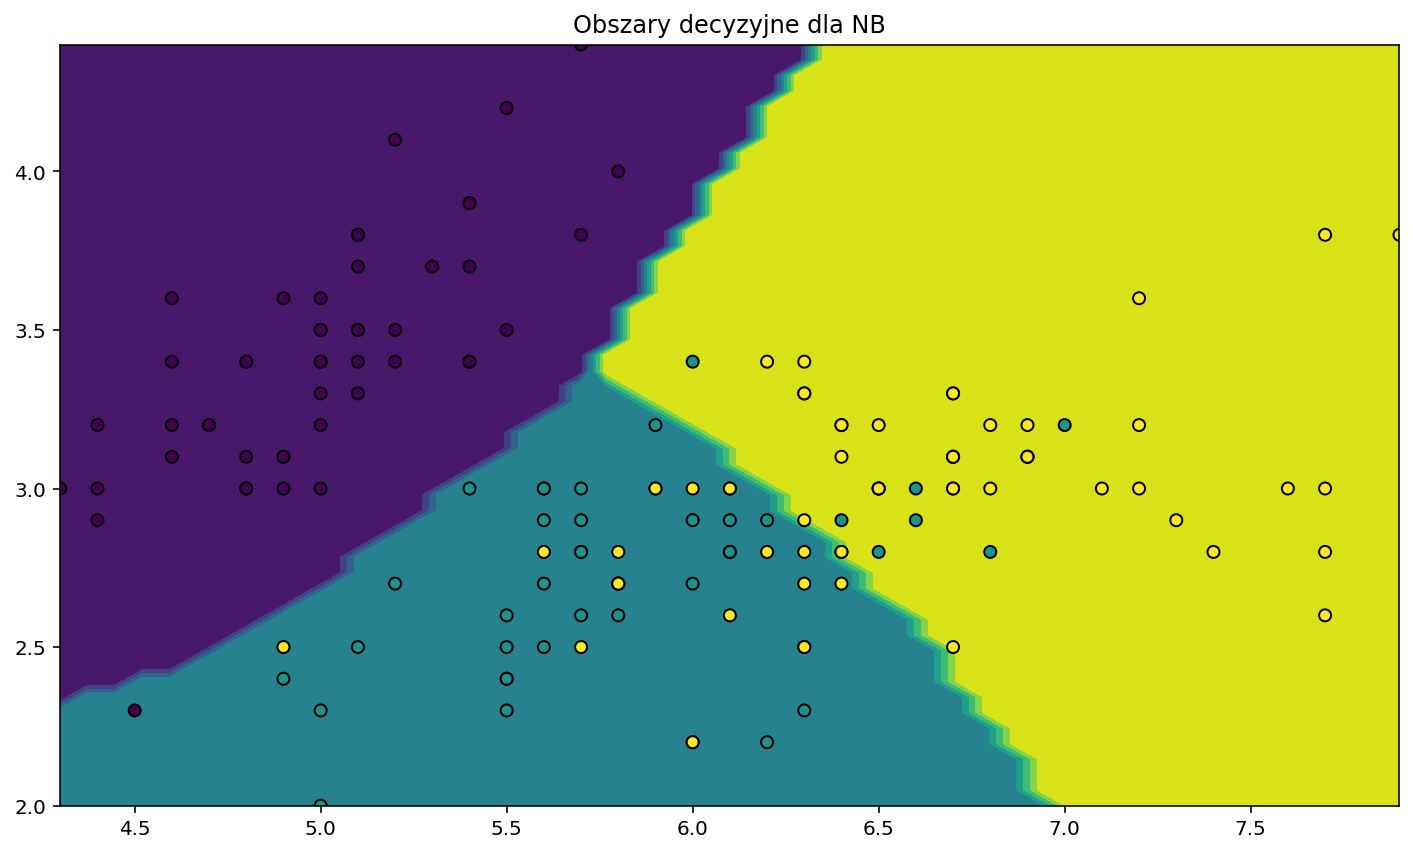

In [1]:
# ZAD.10 Obszary decyzyjne (dane Iris)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB

iris = load_iris()
feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
gnb = GaussianNB().fit(iris.data[:, :2], iris.target)
y_pred = np.reshape(gnb.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()

display.ax_.scatter(
    iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolor="black"
)
plt.title("Obszary decyzyjne dla NB")
plt.show()

---

# 2. LDA i QDA

## 2.1. Klasyfikacja LDA pojedynczego obiektu

In [0]:
# ZAD.11 Linear Discriminant Analysis (LDA)

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]) # cechy
y = np.array([1, 1, 1, 2, 2, 2]) # klasy

lda = LinearDiscriminantAnalysis()
lda.fit(X, y) # uczenie

print("Obiekt [-0.8, -1] klasyfikujemy do", lda.predict([[-0.8, -1]])) # klasyfikujemy obiekt o cechach [-0.8, -1]
print("Obiekt [1.2, 0] klasyfikujemy do", lda.predict([[1.2, 0]])) # klasyfikujemy obiekt o cechach [1.2, 0]
print("Obiekt [3.2, 1.4] klasyfikujemy do", lda.predict([[3.2, 1.4]])) # klasyfikujemy obiekt o cechach [3.2, 1.4]

## 2.2. Macierz pomyłek

In [0]:
# ZAD.12 Porównanie macierzy pomyłek dla NB, LDA i QDA

# BINARNY PROBLEM KLASYFIKACJI
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]) # cechy
y = np.array([1, 1, 1, 2, 2, 2]) # klasy


gnb = GaussianNB()
gnb.fit(X, y) # uczenie NB

lda = LinearDiscriminantAnalysis()
lda.fit(X, y) # uczenie LDA

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y) # uczenie QDA

X_test = np.array([[-1, 0], [-3, -1], [-2, -2], [0, 1], [0, 2], [2, 2]])
y_test = np.array([1, 1, 1, 1, 2, 2])

# Confusion matrix for NB
predictions1 = gnb.predict(X_test) # testowa klasyfikacja
cm1 = confusion_matrix(y_test, predictions1, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=gnb.classes_)
disp.plot()
plt.title("Confusion matrix for Gaussian Naive Bayes")
plt.show()

# Confusion matrix for LDA
predictions2 = lda.predict(X_test) # testowa klasyfikacja
cm2 = confusion_matrix(y_test, predictions2, labels=lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=lda.classes_)
disp.plot()
plt.title("Confusion matrix for LDA")
plt.show()

# Confusion matrix for QDA
predictions3 = qda.predict(X_test) # testowa klasyfikacja
cm3 = confusion_matrix(y_test, predictions3, labels=qda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=qda.classes_)
disp.plot()
plt.title("Confusion matrix for QDA")
plt.show()

In [0]:
# ZAD.13 Porównanie macierzy pomyłek dla NB, LDA i QDA (dane Iris)

# PROBLEM WIELOKLASOWY
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y) # (by default) 75% training and 25% test set


gnb = GaussianNB()
gnb.fit(X_train, y_train) # uczenie NB

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # uczenie LDA

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # uczenie QDA

iris = load_iris()

# Confusion matrix for NB
predictions1 = gnb.predict(X_test) # testowa klasyfikacja
cm1 = confusion_matrix(y_test, predictions1, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=iris['target_names'])
disp.plot()
plt.title("Confusion matrix for Gaussian Naive Bayes")
plt.show()

# Confusion matrix for LDA
predictions2 = lda.predict(X_test) # testowa klasyfikacja
cm2 = confusion_matrix(y_test, predictions2, labels=lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=iris['target_names'])
disp.plot()
plt.title("Confusion matrix for LDA")
plt.show()

# Confusion matrix for QDA
predictions3 = qda.predict(X_test) # testowa klasyfikacja
cm3 = confusion_matrix(y_test, predictions3, labels=qda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=iris['target_names'])
disp.plot()
plt.title("Confusion matrix for QDA")
plt.show()

In [0]:
# ZAD.14 Accuracy

# Oblicz dokładność klasyfikacji (accuracy=poprawne/wszystkie) dla problemu z zad.13
from sklearn import metrics
print("Accuracy of GNB:",metrics.accuracy_score(y_test, predictions1))
print("Accuracy of LDA:",metrics.accuracy_score(y_test, predictions2))
print("Accuracy of QDA:",metrics.accuracy_score(y_test, predictions3))

## 2.3. Podział na zbiór uczący i testowy (porównanie klasyfikatorów)

In [0]:
# ZAD.14  Zależność dokładności klasyfikacji od wielkości zbioru uczącego (dla NB, LDA i QDA)

# Wyrysuj zależność dokładności klasyfikacji (accuracy) od wielkości zbioru testowego.
# (zależność wyrysuj na jednym rysunku dla wszystkich 3 klasyfikatorów)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
accuracyGNB = []
accuracyLDA = []
accuracyQDA = []
test_part = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# ...

plt.plot(test_part,accuracyGNB,label='Gaussian Naive Bayes')
plt.plot(test_part,accuracyLDA,label='LDA')
plt.plot(test_part,accuracyQDA,label='QDA')
plt.axis([0, 1, 0.5, 1.05])
plt.xlabel('Test set size [%]')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## 2.4. Obszary decyzyjne

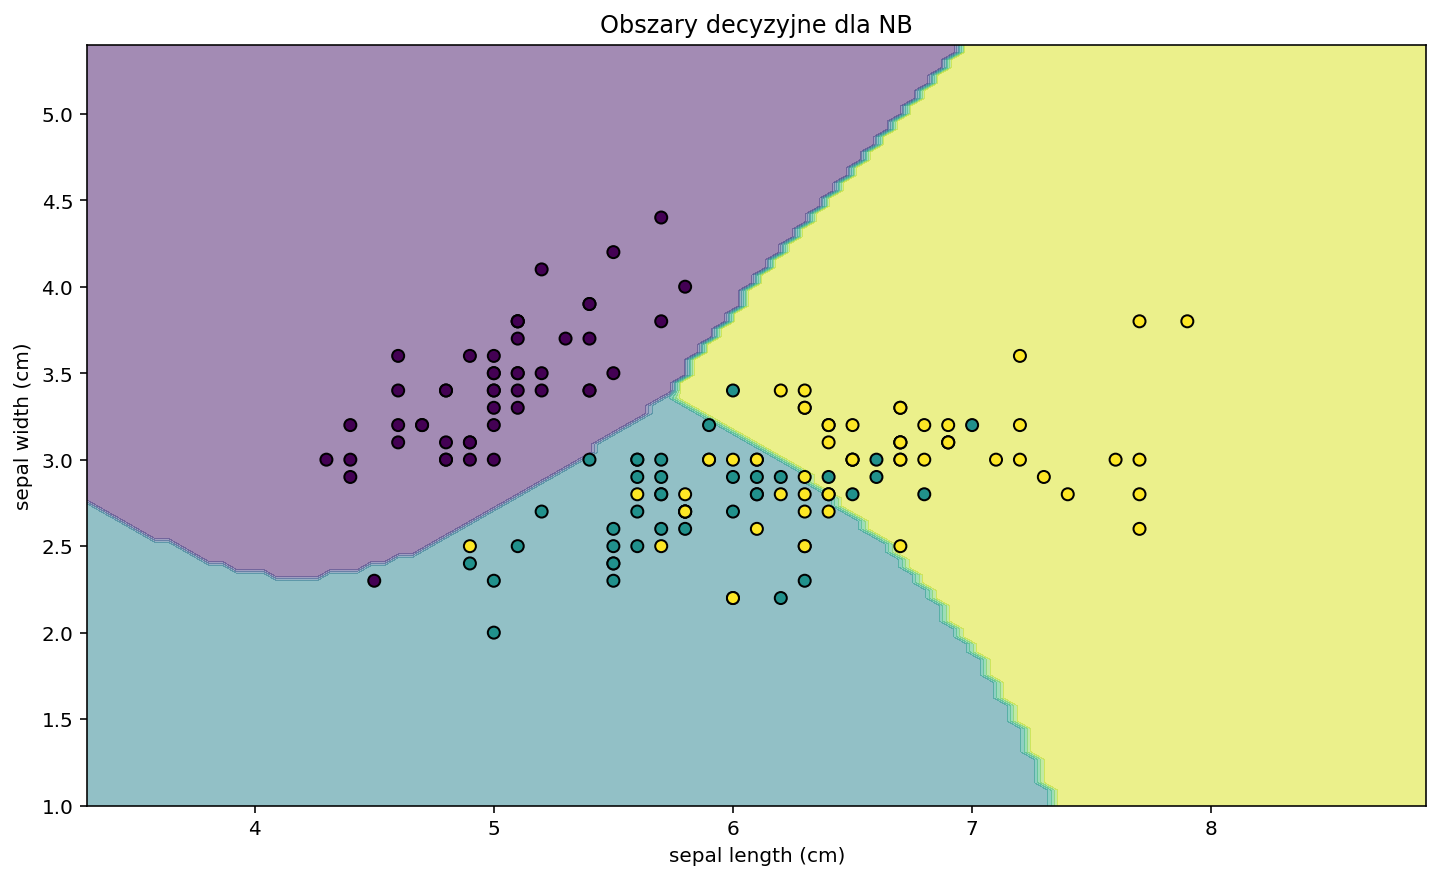

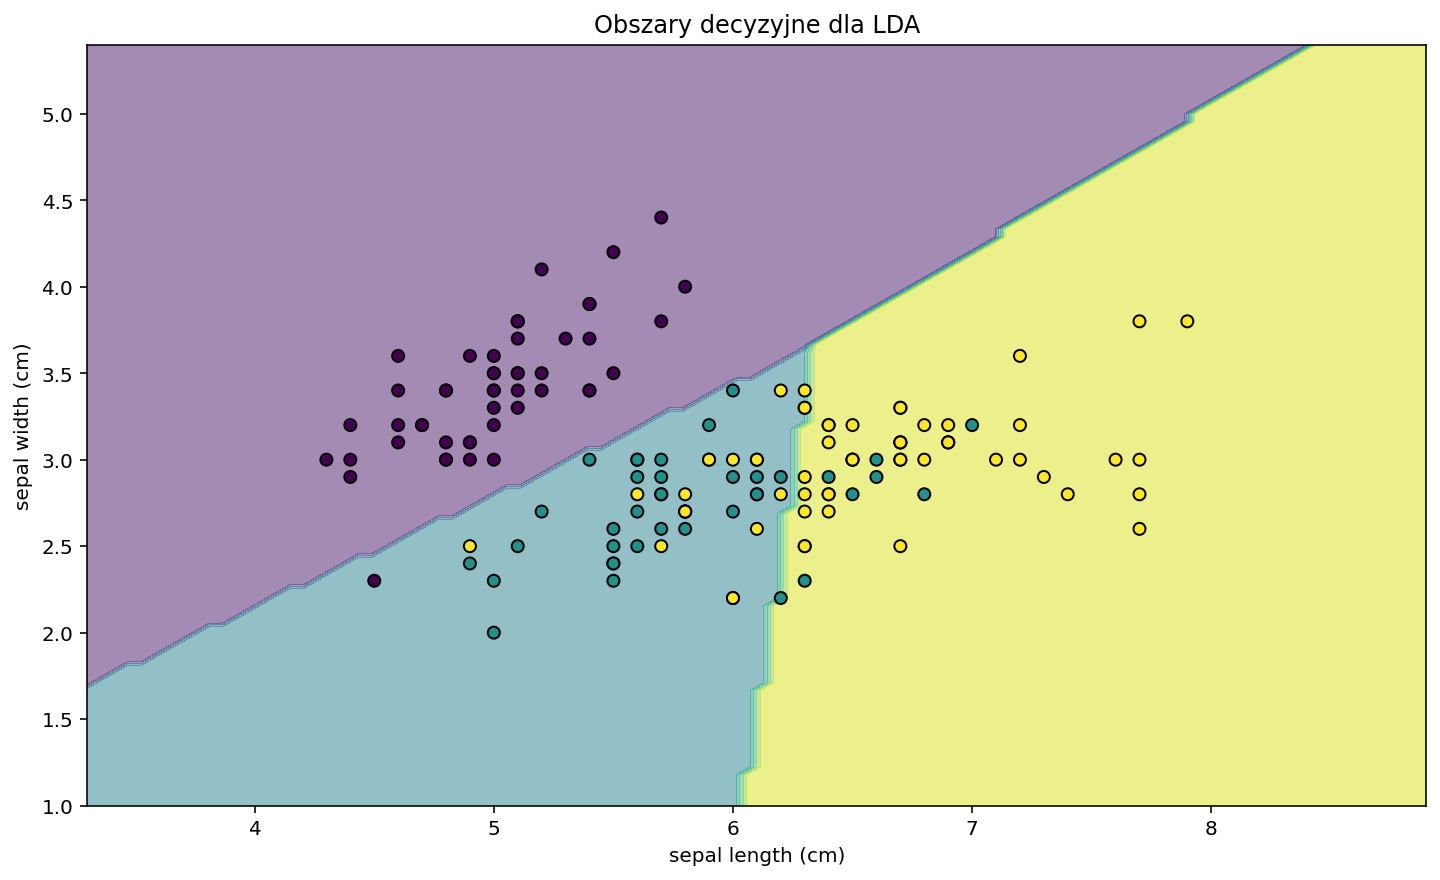

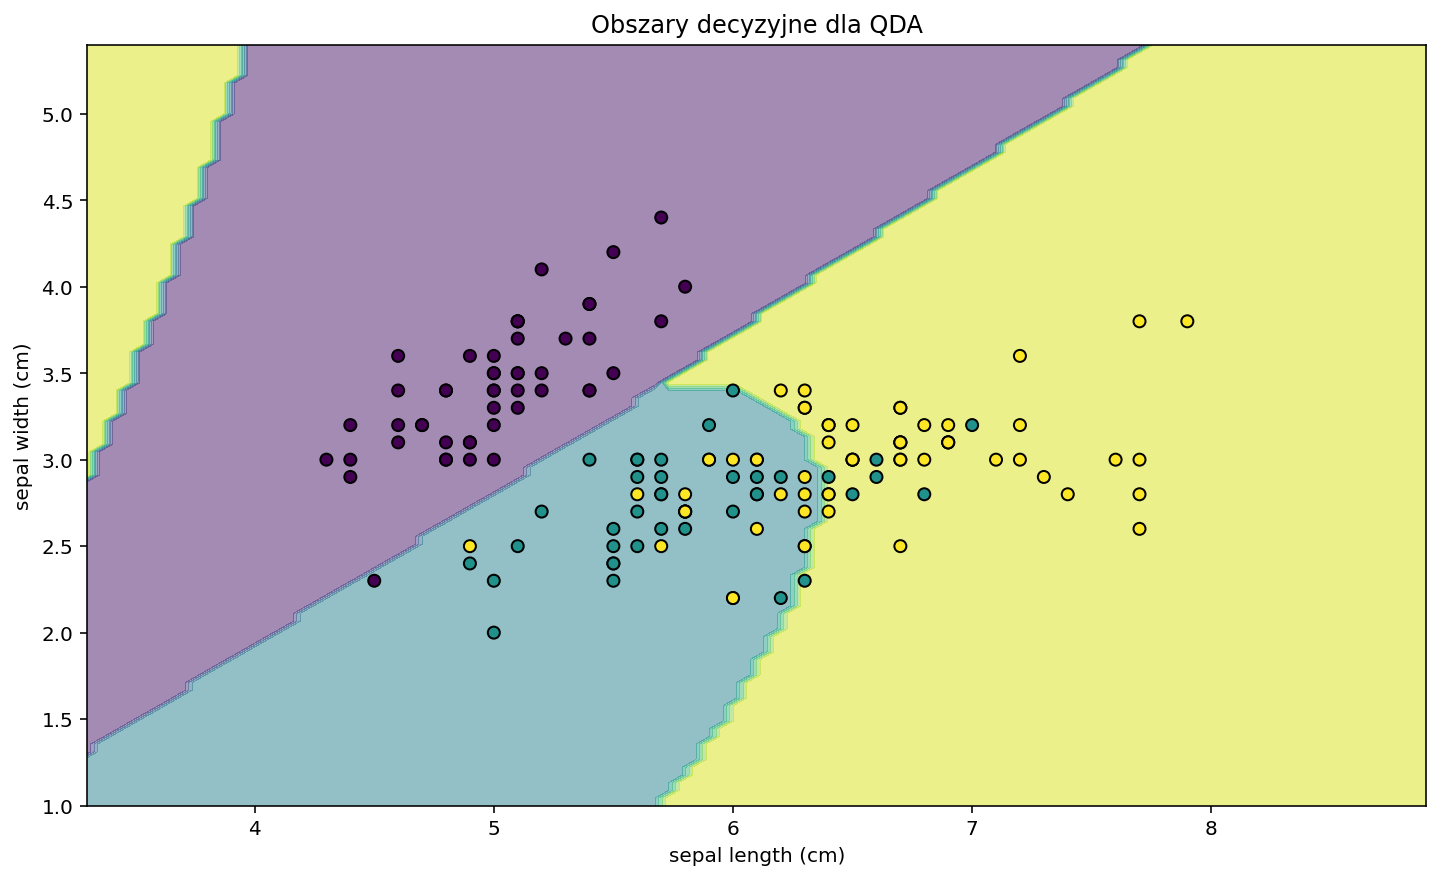

In [2]:
# ZAD.15  Obszary decyzyjne dla NB, LDA i QDA

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

iris = load_iris()
X = iris.data[:, :2] # wybieramy dwie cechy

# obszary decyzyjne dla GNB
classifier = GaussianNB().fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.title("Obszary decyzyjne dla NB")
plt.show()

# obszary decyzyjne dla LDA
classifier = LinearDiscriminantAnalysis().fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.title("Obszary decyzyjne dla LDA")
plt.show()

# obszary decyzyjne dla QDA
classifier = QuadraticDiscriminantAnalysis().fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.title("Obszary decyzyjne dla QDA")
plt.show()

---

# 3. Czy można założyć normalność rozkładów cech w klasach?

In [0]:
# ZAD.16  Sprawdzamy normalność rozkładów cech w klasach (rozrzut danych)

import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
axs = pd.plotting.scatter_matrix(iris_df,
                                 c=iris.target,
                                 figsize=(8, 8),
                                );


In [0]:
iris.feature_names

In [0]:
# ZAD.17  Histogramy poszczególnych cech w klasach

import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

sns.histplot(x='sepal length (cm)', data=iris_df, kde=True, hue=iris.target)
plt.title('sepal length (cm)')
plt.show()

# Wyrysuj histogramy dla pozostałych cech
# ...

# Czy możemy założyć, że cechy te mają rozkład normalny?

---

# Podsumowanie

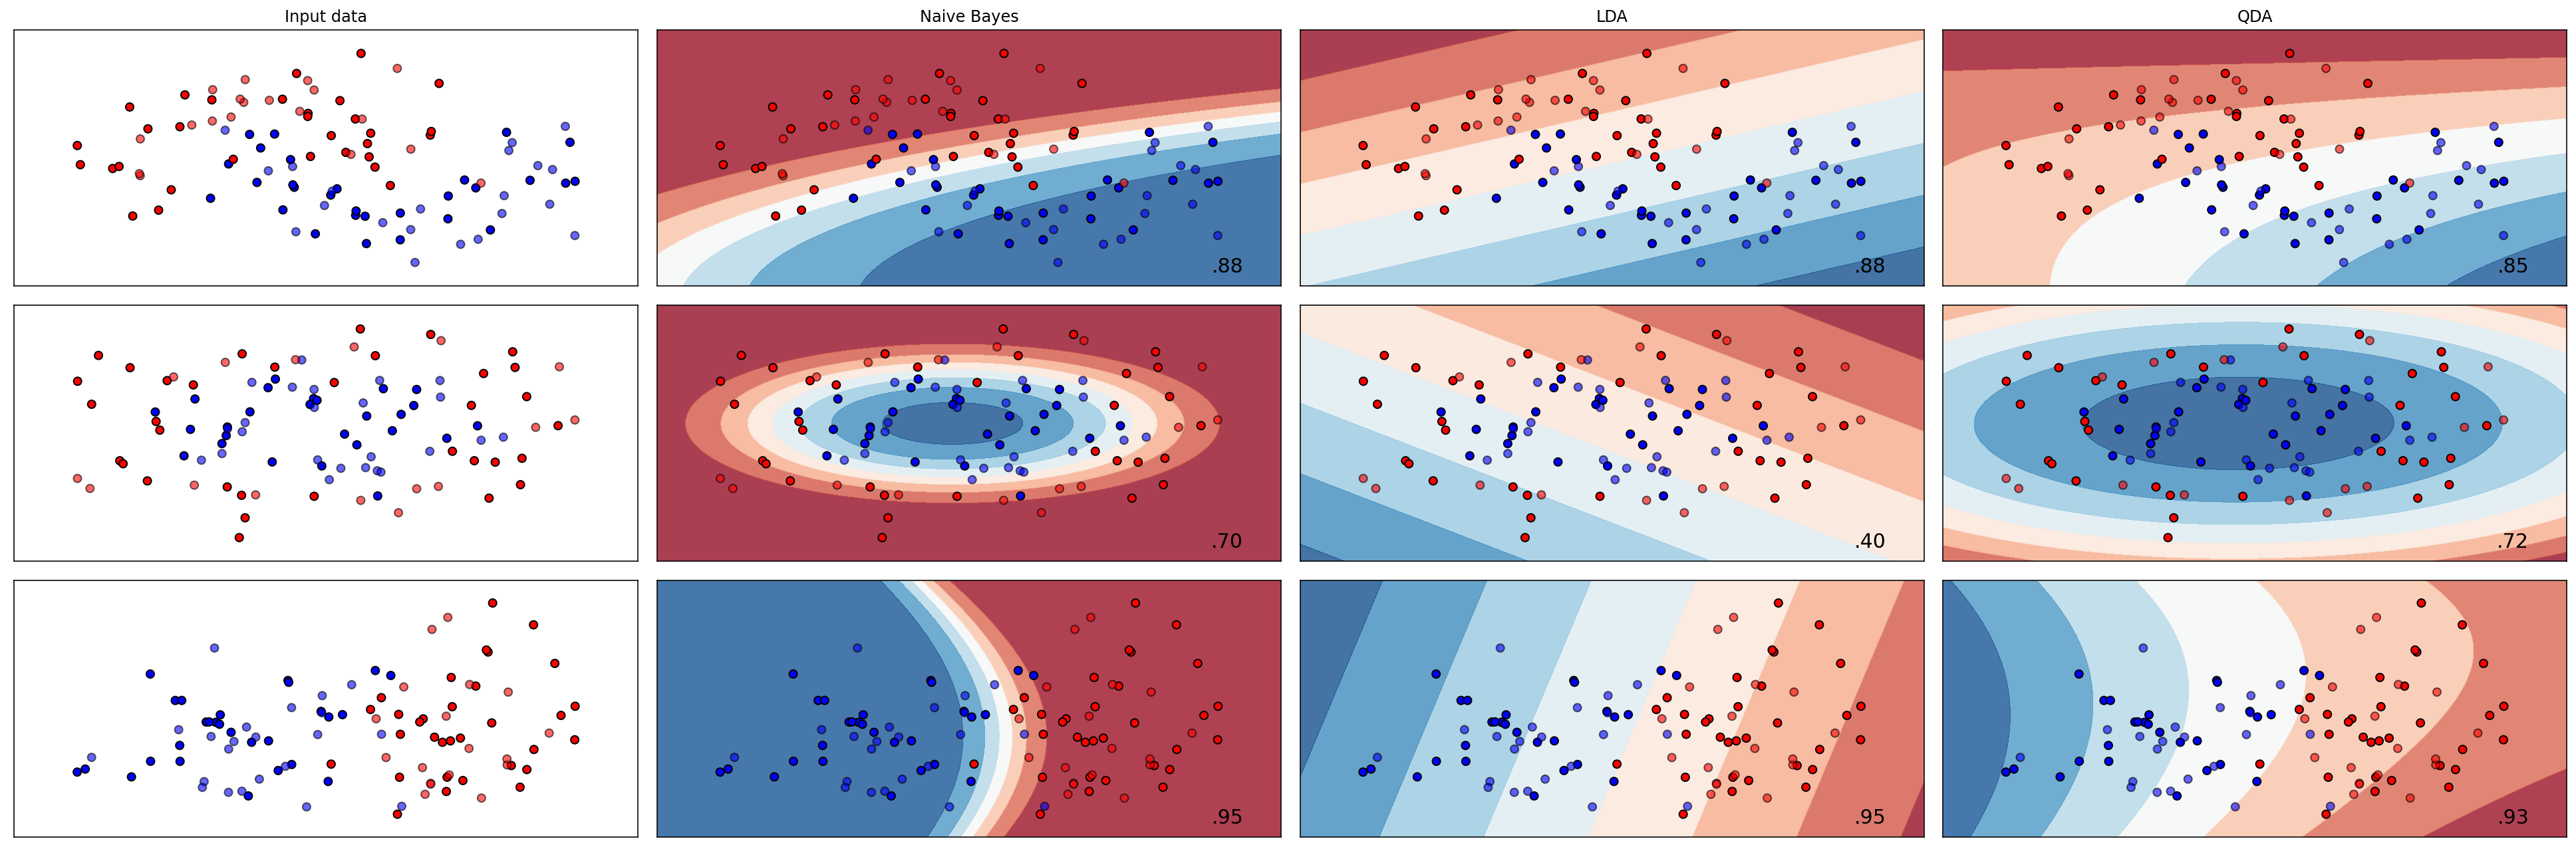

In [3]:
# ZAD.18  Problematyczne rozłożenie danych w klasach

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# Modified for classes by Urszula Libal
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Naive Bayes",
    "LDA",
    "QDA",
]

classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()